# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Targets
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Claculating the Joint Probability

### The Dot Product

In [4]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
a.dot(b)

22

In [5]:
c = np.array([[0, 6], [3, 0], [5, 1]])
c

array([[0, 6],
       [3, 0],
       [5, 1]])

In [6]:
print(a.dot(c))

[21  9]


Figure out the dimensions of the dot product between X_test and prob_token_spam.

1722 x 1

In [7]:
X_test.shape

(1722, 2500)

In [8]:
prob_token_spam.shape

(2500,)

In [9]:
X_test.dot(prob_token_spam).shape

(1722,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | Spam) \, P(Spam)} {P(X)}$$

In [10]:
PROB_SPAM = 0.3116

Take the log number of a mumpy array. Calculate the log probabilities of the toklens given that the e-mail was spam. This was stored in prob_token_spam.

In [11]:
np.log(prob_token_spam)

array([ -4.40234939,  -5.2663143 ,  -5.0124804 , ..., -11.44943173,
       -12.14257891,  -9.30936557])

# Joint probability in log format

In [12]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [13]:
joint_log_spam[:5]

array([12.47901696, 18.88596049,  1.70836529, 18.32541844, 13.80928268])

Calculate the log probability that the e-mails are non-spam given their tokens. Store the result in a variable called joint_log_ham.

$$P(Ham \, | \, X) = \frac{P(X \, | Ham) \, (1-P(Spam))} {P(X)}$$

In [14]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([-43.576946  , -43.89391298, -32.90817712, -49.50761869,
       -41.80920404])

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) > P(Ham \, | \, X)$$
<br>
<center><strong> OR </strong></center>
<br>
$$P(Spam \, | \, X) < P(Ham \, | \, X)$$

Create the verctor of predictions, our $\hat y$. Remember that spam e-mails should have the value 1 (true) and non-spam e-mails should have the value 0 (false). Store results in a variable called `predictions`.

In [16]:
predictions = joint_log_spam > joint_log_ham

In [17]:
predictions[-5:]

array([False, False, False, False, False])

In [18]:
predictions[-5:]*1

array([0, 0, 0, 0, 0])

In [19]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

$$P(Spam \, | \, X)P(Spam) ≠ \frac{P(X \, | Spam) \, P(Spam)} {P(X)}$$

In [20]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

### Accuracy

In [21]:
correct_docs = (y_test == predictions).sum()
print('Docs classified correctly:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrecly:', numdocs_wrong)

Docs classified correctly: 1677
Docs classified incorrecly: 45


In [22]:
# Accuracy
correct_docs/len(X_test)

0.9738675958188153

In [23]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction clssified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction clssified incorrectly is 2.61%
Accuracy of the model is 97.39%


# Visualizing the Results

In [27]:
# Chaart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=10)

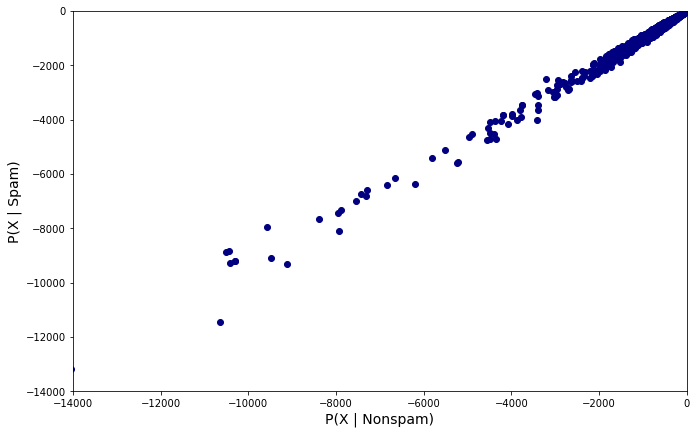

In [26]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Desicion Boundary

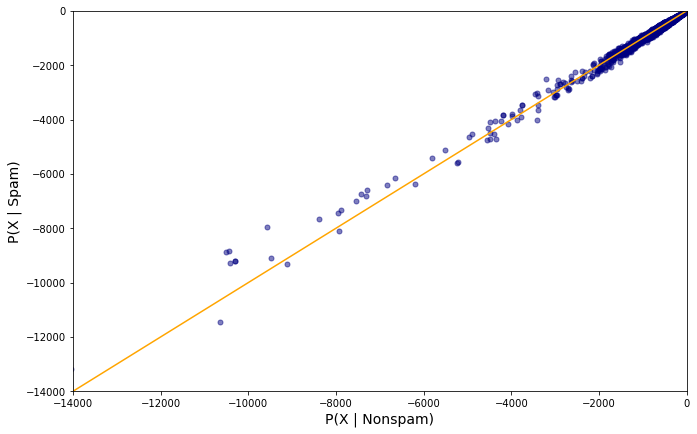

In [30]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

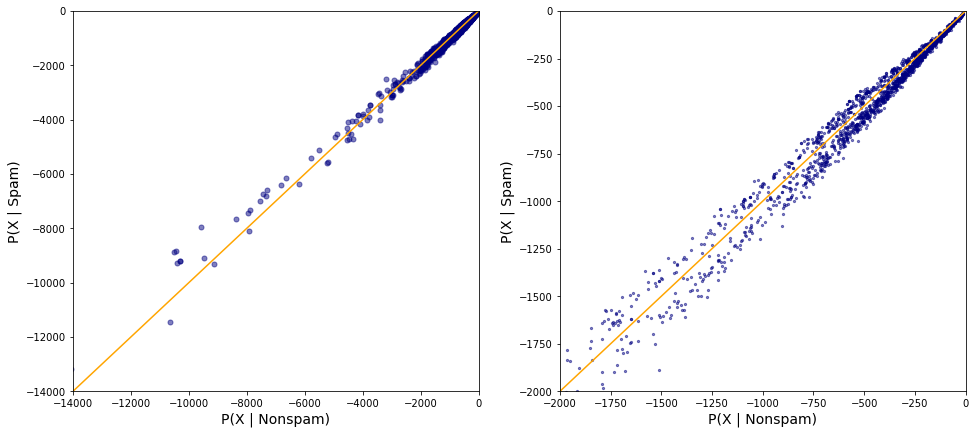

In [34]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=5)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [35]:
# Chart styling
sns.set_style('whitegrid')
labels = 'Actual category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

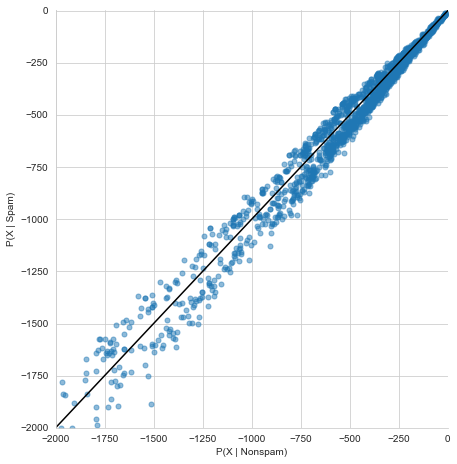

In [41]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

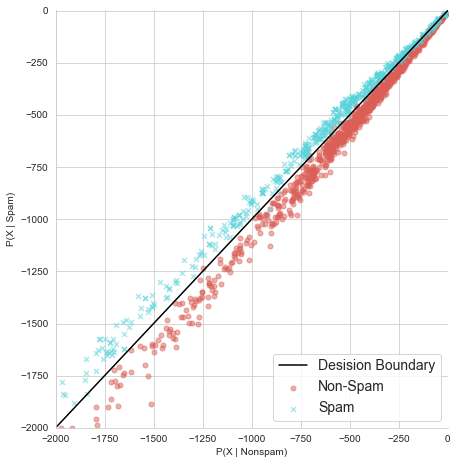

In [46]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(['Desision Boundary', 'Non-Spam', 'Spam'], loc='lower right', fontsize=14)

plt.show()

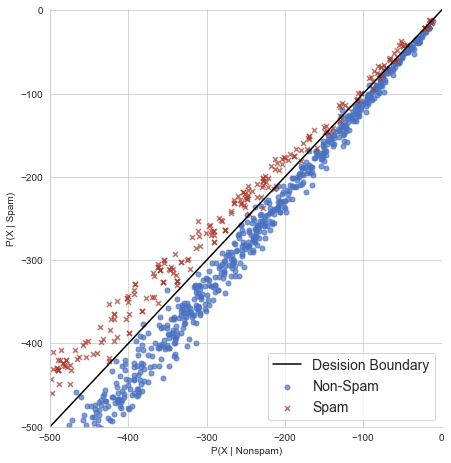

In [49]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(['Desision Boundary', 'Non-Spam', 'Spam'], loc='lower right', fontsize=14)

plt.show()